In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('final.csv', index_col=0)
df = df[df['ARR_DEL15']==1]
#df = df[df['YEAR']==2017]
df = df.drop('ARR_DEL15',1)

/home/rishi/.local/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [23]:
def func(r):
    if(r['ARR_DELAY']<0):
        return (-1)*r['ARR_DELAY']
    else:
        return r['ARR_DELAY']
df['ARR_DELAY'] = df.apply(lambda r: func(r), 1)

In [24]:
stats = df.describe()
stats['ARR_DELAY']

count    188939.000000
mean         62.924489
std          72.308159
min          15.000000
25%          24.000000
50%          40.000000
75%          75.000000
max        1711.000000
Name: ARR_DELAY, dtype: float64

In [79]:
quantiles = df.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
quantiles['ARR_DELAY']

0.01     15.0
0.25     23.0
0.50     39.0
0.75     74.0
0.99    299.0
Name: ARR_DELAY, dtype: float64

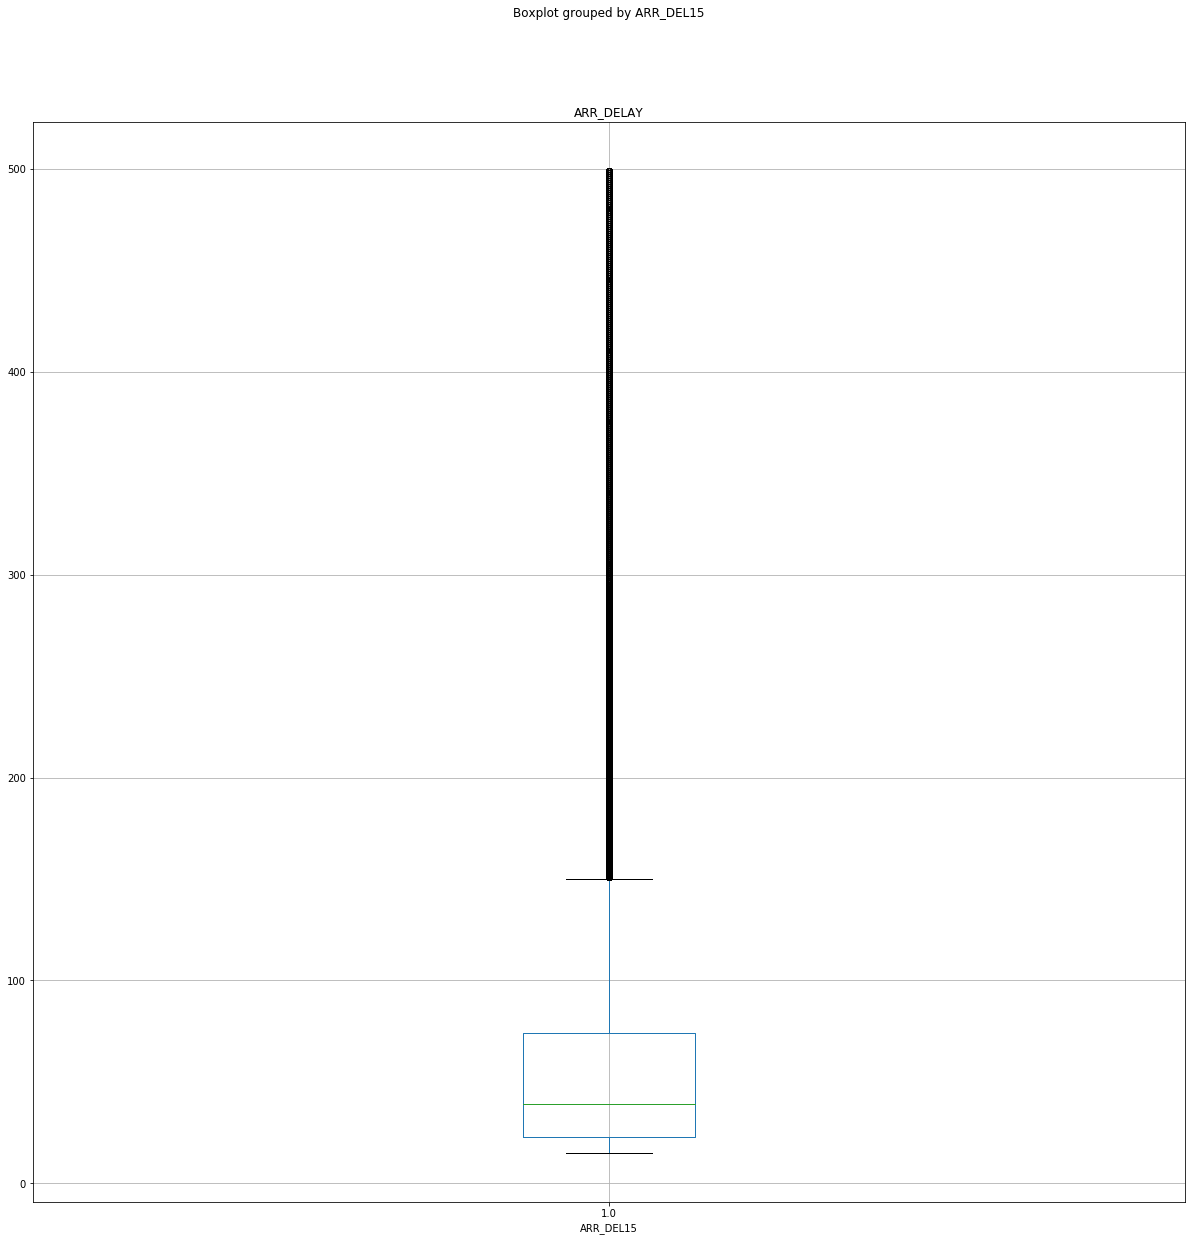

In [78]:
df=df[df['ARR_DELAY']<500]
df.boxplot(by='ARR_DEL15',column=['ARR_DELAY'],figsize=(20,20))

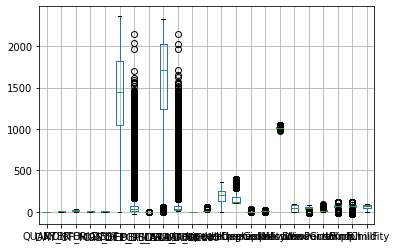

In [74]:
_, bp = pd.DataFrame.boxplot(df, return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [75]:
df.columns

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_DELAY', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [15]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802174 entries, 0 to 1827266
Data columns (total 23 columns):
QUARTER          int64
MONTH            int64
DAY_OF_MONTH     int64
ORIGIN           int64
DEST             int64
CRS_DEP_TIME     int64
DEP_DELAY        int64
DEP_DEL15        int64
CRS_ARR_TIME     int64
ARR_DELAY        int64
ARR_DEL15        int64
windspeedKmph    int64
winddirDegree    int64
weatherCode      int64
precipMM         int64
visibility       int64
pressure         int64
cloudcover       int64
DewPointF        int64
WindGustKmph     int64
tempF            int64
WindChillF       int64
humidity         int64
dtypes: int64(23)
memory usage: 330.0 MB


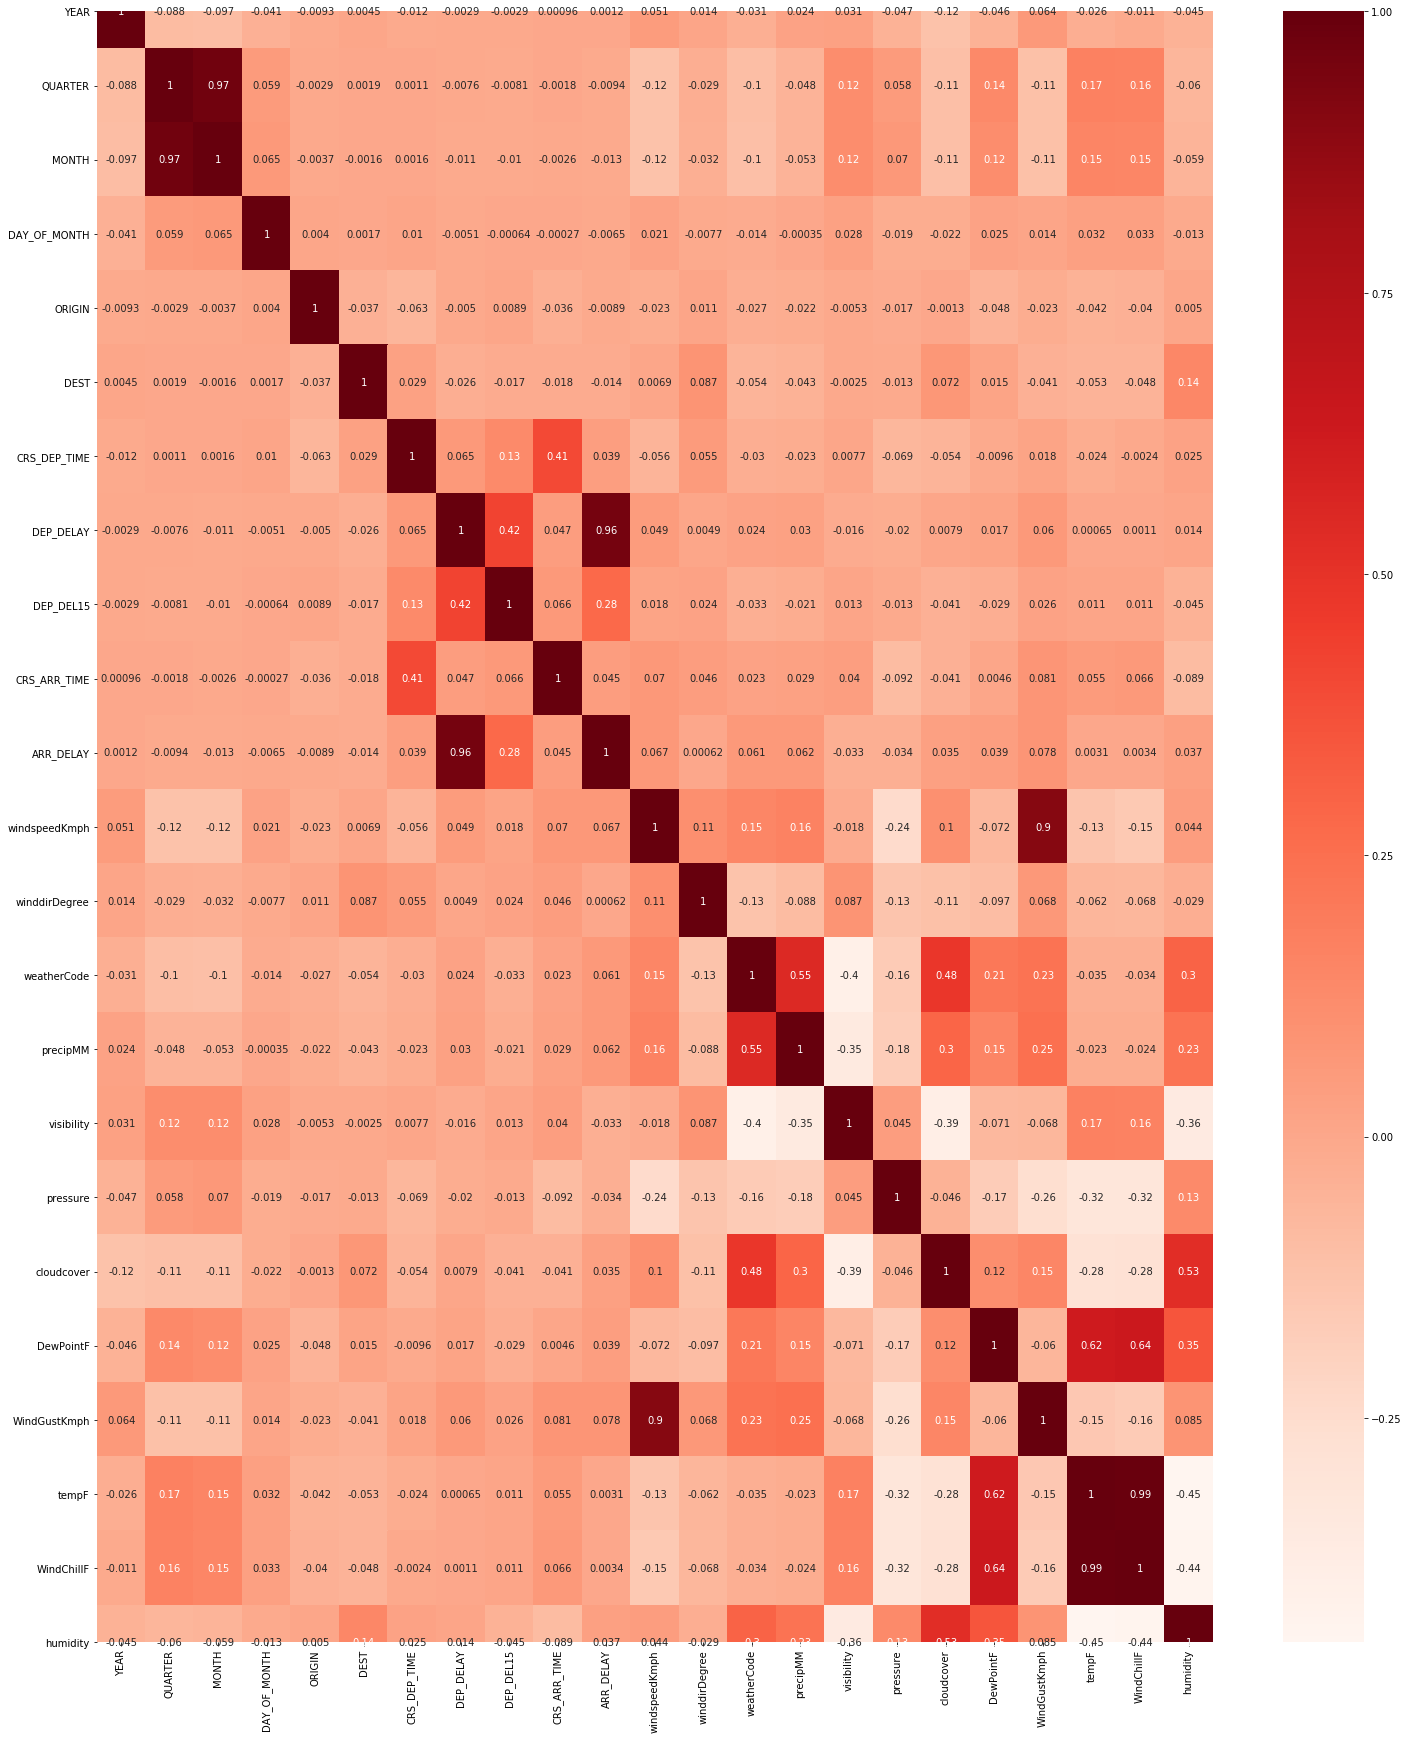

In [9]:
plt.figure(figsize=(25,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
cor_target = abs(cor["ARR_DELAY"])
relevant_features = cor_target[cor_target>0.06]
relevant_features

DEP_DELAY        0.958357
DEP_DEL15        0.280769
ARR_DELAY        1.000000
windspeedKmph    0.067078
weatherCode      0.061360
precipMM         0.061626
WindGustKmph     0.077894
Name: ARR_DELAY, dtype: float64

In [3]:
X = df.drop(['ARR_DELAY'],1)
y = df['ARR_DELAY']
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

/home/rishi/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 5.213034
Best score using built-in LassoCV: 0.920945


In [4]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 13 variables


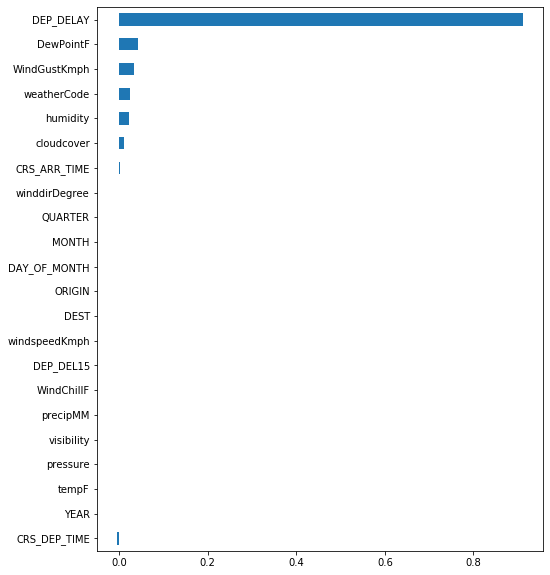

In [5]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")